# 토픽모델링 (LDA)
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

In [1]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from  konlpy.tag import Twitter

In [11]:
df_train = pd.read_excel('data/News.xlsx', delimiter='\t', keep_default_na=False)
print(df_train.head())
#Countvectorizer적용을 위해 list로 변환
list_train = df_train['본문'].tolist()

         뉴스 식별자        일자   언론사                                기고자  \
0  2.100101e+06  20190503  매일경제                                박창영   
1  1.100901e+06  20190503  중앙일보  정은혜(jeong.eunhye1@joongang.co.kr)   
2  8.100401e+06  20190503   YTN                                      
3  8.100401e+06  20190503   YTN                                      
4  8.100401e+06  20190503   YTN                                      

                                        제목    통합 분류1 통합 분류2 통합 분류3  \
0  [K-POP] 5년 계약 빌보드 진출 약속 `프로듀스 101`의 승부수       미분류                 
1              '버닝썬'에서 김상교씨를 최초 폭행한 손님의 정체  사회>사건_사고                 
2              불법 촬영물 유포 논란 '기자 단톡방' 내사 착수  사회>사건_사고                 
3                '버닝썬 유착 고리' 전직 경찰관, 혐의 부인  사회>사건_사고                 
4          "경찰 비대화" vs "아니다"...수사권 갈등 쟁점은   사회>사건_사고                 

    사건/사고 분류1    사건/사고 분류2 사건/사고 분류3                    인물  \
0  범죄>범죄일반>마약                                      정병욱,안준영   
1  범죄>성범죄>성추행   범죄>범죄일반>폭행        

In [12]:
list_train

['"YG에서 두 친구가 참여한다고 해서 깜짝 놀랐습니다."(안준영 PD)\n3일 방송된 엠넷 \'프로듀스 101\' 시즌4 \'프로듀스 X 101\'에 YG엔터테인먼트가 연습생을 내보냈다. 최근 서울 여의도 63컨벤션센터에서 만난 제작진에게 \'YG 연습생을 섭외하기 위해 삼고초려를 했냐\'고 물었더니 \'YG에서 먼저 참여 의사를 알려왔다\'고 답했다. YG는 \'프로듀..',
 "클럽 '버닝썬' 폭행 피해자 김상교(29)씨를 최초 폭행한 클럽 손님이 이문호 버닝썬 대표와 '호형호제'하는 사이라는 보도가 나왔다. 3일 노컷뉴스에 따르면 김씨를 폭행한 클럽 손님 최모(35)씨는 현재 건대입구역 인근 카페의 공동대표로 이 대표와 친분이 두터운 사이다. \n \n 단순히 친분만 두터운 게 아니라, 같은 브랜드 카페를 운영하는 긴밀한 관계이..",
 "경찰이 성관계 불법 촬영물 등 음란물 유포 논란을 빚은 이른바 '기자 단톡방' 구성원에 대한 내사에 착수했습니다.\n\n서울지방경찰청 사이버수사대는 기자와 PD 등 언론계 종사자로 구성된 카카오톡 오픈 채팅방에 대해 내사를 진행하고 있습니다.\n\n경찰 측은 해당 채팅방을 수사해달라는 국민 청원과 언론 보도가 잇따른 데 따른 조치라고 설명했습니다.\n\n앞서 이 ..",
 '클럽 버닝썬과 경찰 사이 유착 고리로 지목돼 구속기소 된 전직 경찰관이 법정에서 혐의를 부인했습니다.\n\n전직 경찰관 강 모 씨는 서울중앙지방법원에서 열린 알선수재 혐의 사건 첫 공판에서 2천만 원 자체를 받은 적이 없다는 입장이라고 밝혔습니다.\n\n앞서 강 씨는 지난해 버닝썬에 미성년자가 출입한 사건을 무마해주는 명목으로 버닝썬 공동대표로부터 2천만 원을..',
 '[앵커]\n수사권 조정안을 두고 검찰과 경찰이 다시 대립하는 모양새입니다.\n\n그런데 이 내용이 담긴 형사소송법과 검찰청법 개정안만 논란이 되는 게 아닙니다.\n\n검경 수사권 갈등에 어떤 쟁점이 있는지 김대근 기자가 짚어봤습니다.\n\n[기자]\n\n■ "경찰 수사 견제 불가

In [13]:
twitter = Twitter()
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [14]:
vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

In [15]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [16]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [17]:
# 10개의 토픽을 출력합니다
%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")
        
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
경찰관           범죄            앵커            애나            입건            
전직            여성            이다            유통            신분            
미성년           이용            스타            여성            피의자           
출입            약물            투데이           중국인           오후            
무마            단속            매일경제          직원            관계자           
구속영장          성범죄           오늘            이문호           로이킴           
신청            최근            취재            md            경찰관           
경찰서           유통            연예계           영업            성매매           
지난해           사회            은퇴            황하나           알선            
지목            집중            파티            vip           10            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
대통령 

In [18]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [19]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [20]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
도서관           유통            구속            유리            pd            
게임            관계자           영장            홀딩스           jyp           
정국            10            심사            박한별           ytn           
최근            질문            실질            남편            라면            
아니다           취재            서울중앙지법        유모            실적            
연예인           구속            이문호           사업            이하            
10            입건            피의자           업체            fm            
문화            직원            부장            함께            cctv          
이름            진의            구속영장          배우            조현지           
버닝팜           이문호           심문            파트너           sm            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
27  

In [21]:
# 골프 관련 토픽 89를 가중치로 정렬합니다
golf = np.argsort(document_topics100[:, 89])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in golf[:2]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")

[머니투데이 이동훈 기자] 
민갑룡 경찰청장이 14일 오전 서울 여의도 국회에서 열린 행정안전위원회 전체회의에 출석해 버닝썬 사건 등에 대한 업무보고를 한 뒤 인사를 하고 있다. 

[머니투데이 이동훈 기자] 
민갑룡 경찰청장이 14일 오전 서울 여의도 국회에서 열린 행정안전위원회 전체회의에 출석해 버닝썬 사건 등에 대한 업무보고를 하고 있다. 



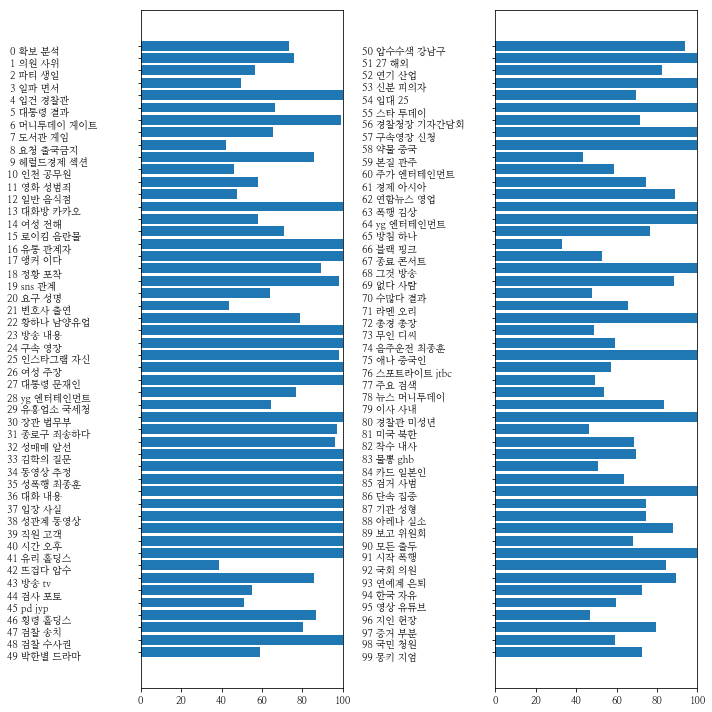

In [22]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# 폰트문제 처리 (윈도우나 리눅스 등에 따라 폰트 경로 상이함)
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()